# Multi Plots (Advanced)

This notebook contains **practice problems with full solutions** on creating multi-plot figures in Matplotlib.

## What you'll practice
- `plt.subplots()` grids, shared axes, and consistent styling
- `GridSpec` layouts (including marginal plots)
- Common legends, `suptitle`, and layout control (`constrained_layout`, `tight_layout`)
- Twin axes (`twinx`) and annotations
- Heatmaps with colorbars and in-cell annotations
- `subplot_mosaic` for dashboard-style layouts
- Inset axes (zoom-in view)

> All data is generated in-notebook (no external CSV needed).

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# Reproducibility
rng = np.random.default_rng(42)

# Prefer a decent built-in style if available
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except Exception:
    # Fall back to Matplotlib default
    pass

# A small helper to keep figures readable
mpl.rcParams.update({
    'figure.figsize': (11, 6),
    'axes.titlesize': 12,
    'axes.labelsize': 11,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
})

## Problem 1 — Shared x-axis, different series per panel, one common legend

Create a **2×2** grid of subplots showing the following signals across the same x-range:
- Panel A: `sin(x)` and a noisy `sin(x)`
- Panel B: `cos(x)` and a noisy `cos(x)`
- Panel C: `sin(x) + cos(x)`
- Panel D: absolute value `|sin(x) - cos(x)|`

Requirements:
- Use `sharex=True`.
- Put a **single legend** for the entire figure (not one per axis).
- Add a figure-level title with `fig.suptitle`.
- Use `constrained_layout=True` (or `tight_layout` + manual spacing).


In [2]:
# Starter (optional)
x = np.linspace(0, 2 * np.pi, 400)
noise = 0.15 * rng.standard_normal(size=x.size)

# TODO: Create the 2x2 shared-x grid and plot the requested signals.
# TODO: Add one common legend, and a suptitle.
None

C:\Users\user1\AppData\Local\Temp\ipykernel_8988\2384770023.py:54: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=0.85)


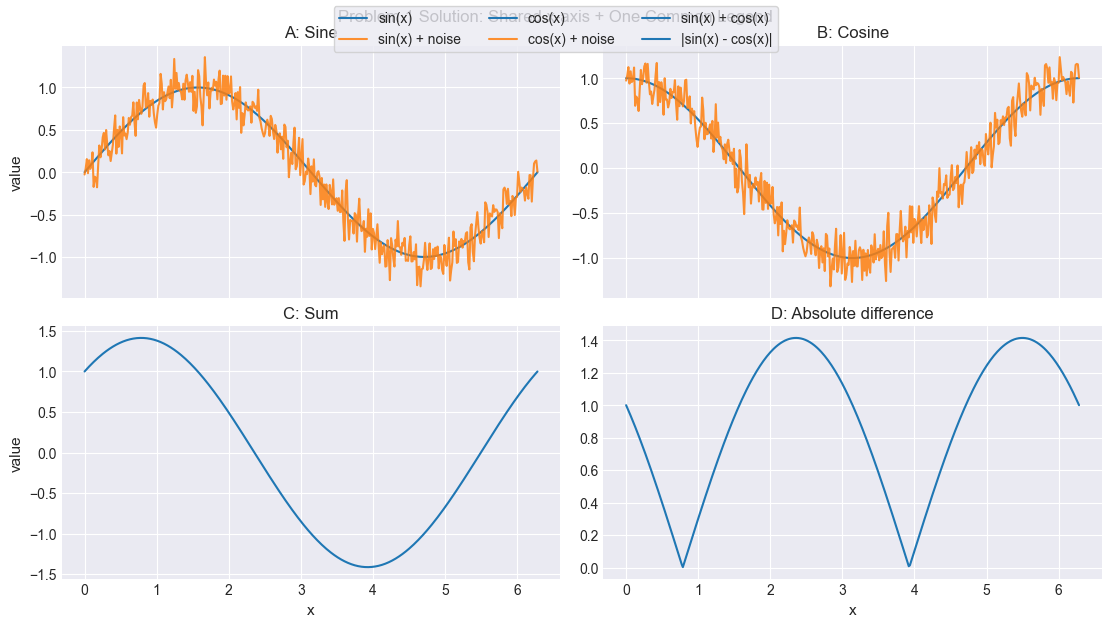

In [3]:
# Solution
x = np.linspace(0, 2 * np.pi, 400)
noise = 0.15 * rng.standard_normal(size=x.size)

y_sin = np.sin(x)
y_cos = np.cos(x)
y_sin_noisy = y_sin + noise
y_cos_noisy = y_cos + noise

fig, axs = plt.subplots(2, 2, sharex=True, constrained_layout=True)

# A
axs[0, 0].plot(x, y_sin, label='sin(x)')
axs[0, 0].plot(x, y_sin_noisy, label='sin(x) + noise', alpha=0.85)
axs[0, 0].set_title('A: Sine')
axs[0, 0].set_ylabel('value')

# B
axs[0, 1].plot(x, y_cos, label='cos(x)')
axs[0, 1].plot(x, y_cos_noisy, label='cos(x) + noise', alpha=0.85)
axs[0, 1].set_title('B: Cosine')

# C
axs[1, 0].plot(x, y_sin + y_cos, label='sin(x) + cos(x)')
axs[1, 0].set_title('C: Sum')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('value')

# D
axs[1, 1].plot(x, np.abs(y_sin - y_cos), label='|sin(x) - cos(x)|')
axs[1, 1].set_title('D: Absolute difference')
axs[1, 1].set_xlabel('x')

# Common legend: collect handles/labels from all axes
handles, labels = [], []
for ax in axs.ravel():
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

# Deduplicate while preserving order
seen = set()
uniq_handles, uniq_labels = [], []
for h, l in zip(handles, labels):
    if l not in seen:
        uniq_handles.append(h)
        uniq_labels.append(l)
        seen.add(l)

fig.legend(uniq_handles, uniq_labels, loc='upper center', ncol=3, frameon=True)
fig.suptitle('Problem 1 Solution: Shared x-axis + One Common Legend', y=1.02)

# Make room for the legend above
fig.subplots_adjust(top=0.85)
plt.show()

## Problem 2 — GridSpec layout with marginal histograms

Create a figure that looks like a common "joint plot":
- Center: scatter plot of `(x, y)`
- Top: histogram of `x`
- Right: histogram of `y` (horizontal)

Requirements:
- Use `matplotlib.gridspec.GridSpec`.
- Share axes so the histograms align with the scatter plot.
- Remove redundant tick labels on marginal plots.
- Add a title to the scatter panel.


In [4]:
# Starter data
n = 800
x = rng.normal(loc=0.0, scale=1.0, size=n)
y = 0.7 * x + rng.normal(loc=0.0, scale=0.9, size=n)

# TODO: Build a GridSpec with marginal histograms aligned to the scatter.
None

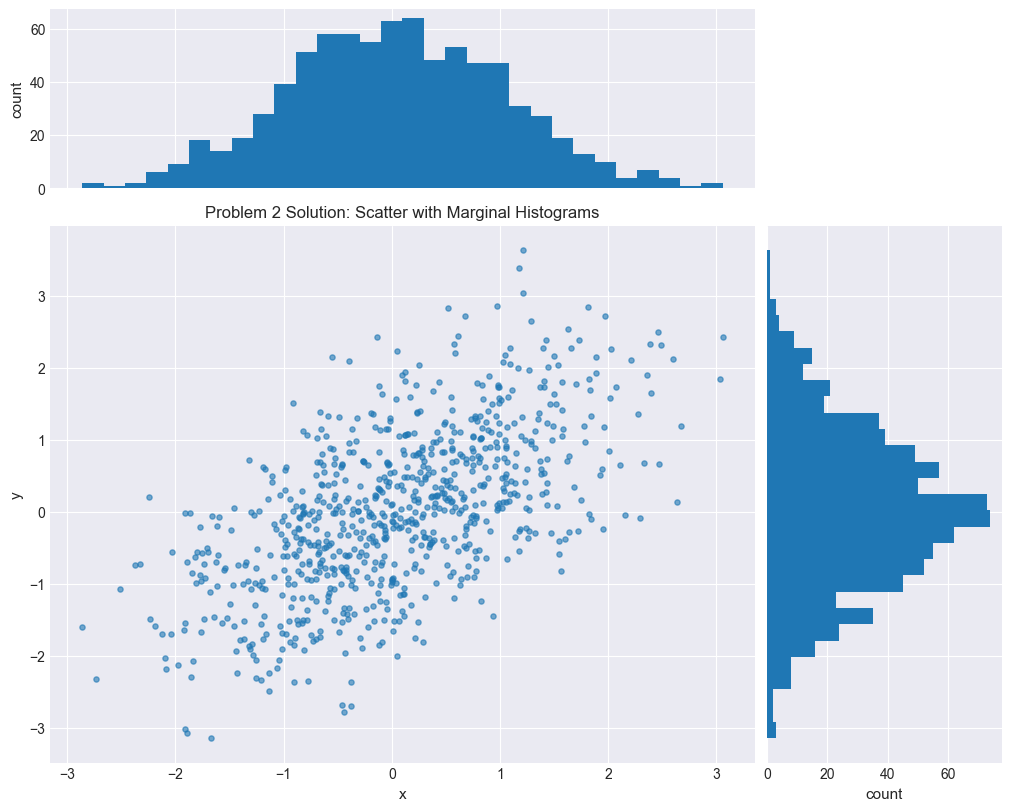

In [5]:
# Solution
from matplotlib.gridspec import GridSpec

n = 800
x = rng.normal(loc=0.0, scale=1.0, size=n)
y = 0.7 * x + rng.normal(loc=0.0, scale=0.9, size=n)

fig = plt.figure(constrained_layout=True, figsize=(10, 8))
gs = GridSpec(nrows=4, ncols=4, figure=fig)

ax_scatter = fig.add_subplot(gs[1:, :3])
ax_histx = fig.add_subplot(gs[0, :3], sharex=ax_scatter)
ax_histy = fig.add_subplot(gs[1:, 3], sharey=ax_scatter)

# Scatter
ax_scatter.scatter(x, y, s=14, alpha=0.6)
ax_scatter.set_xlabel('x')
ax_scatter.set_ylabel('y')
ax_scatter.set_title('Problem 2 Solution: Scatter with Marginal Histograms')

# Histograms
ax_histx.hist(x, bins=30)
ax_histy.hist(y, bins=30, orientation='horizontal')

# Hide labels on marginal axes to reduce clutter
plt.setp(ax_histx.get_xticklabels(), visible=False)
plt.setp(ax_histy.get_yticklabels(), visible=False)
ax_histx.set_ylabel('count')
ax_histy.set_xlabel('count')

# Optional: make hist axes look "attached"
ax_histx.tick_params(axis='x', which='both', length=0)
ax_histy.tick_params(axis='y', which='both', length=0)

plt.show()

## Problem 3 — Twin y-axis time series with shading and annotation

Generate a daily time series `value` and `volume` (two different scales) for ~180 days.

Requirements:
- Use `twinx()` so both series share the same x-axis.
- Format the date axis nicely (monthly ticks).
- Add a shaded interval (e.g., a "campaign period") using `axvspan`.
- Annotate the day with the maximum `value`.
- Use one legend that clearly distinguishes both axes' lines.


In [6]:
# Starter data
dates = pd.date_range('2025-01-01', periods=180, freq='D')
trend = np.linspace(0, 2.5, len(dates))
value = 10 + trend + rng.normal(0, 0.8, len(dates)).cumsum() * 0.02
volume = 200 + 40 * np.sin(np.linspace(0, 8*np.pi, len(dates))) + rng.normal(0, 18, len(dates))

# TODO: Plot value and volume with twinx(), shaded interval, date formatting, and annotation.
None

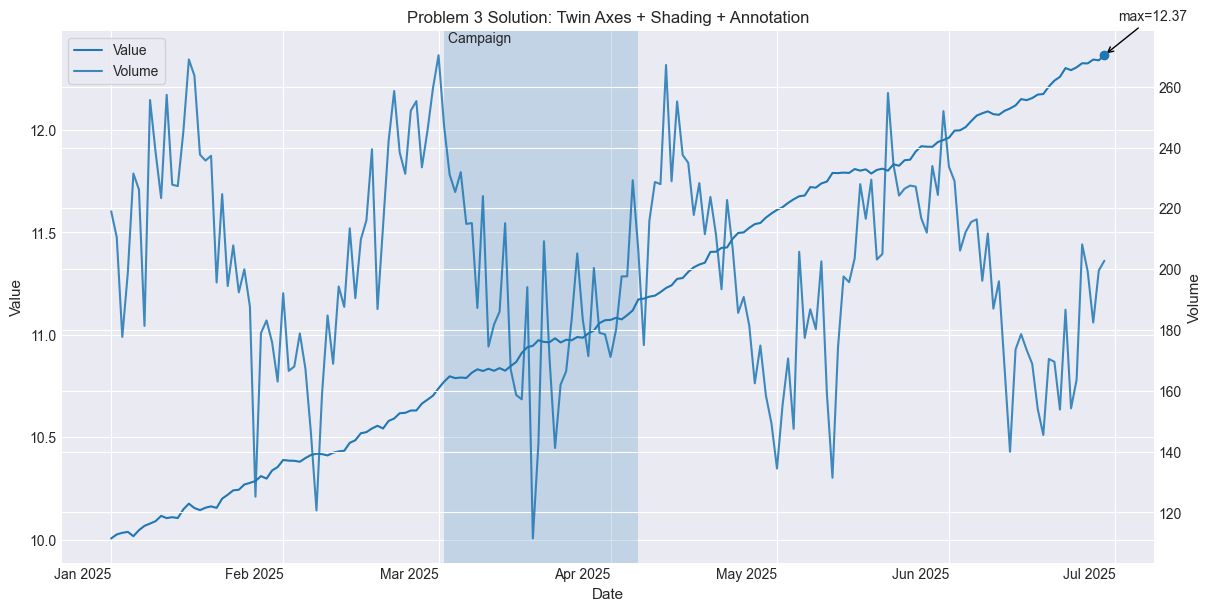

In [7]:
# Solution
dates = pd.date_range('2025-01-01', periods=180, freq='D')
trend = np.linspace(0, 2.5, len(dates))
value = 10 + trend + rng.normal(0, 0.8, len(dates)).cumsum() * 0.02
volume = 200 + 40 * np.sin(np.linspace(0, 8*np.pi, len(dates))) + rng.normal(0, 18, len(dates))

fig, ax1 = plt.subplots(constrained_layout=True, figsize=(12, 6))
ax2 = ax1.twinx()

line1, = ax1.plot(dates, value, label='Value')
line2, = ax2.plot(dates, volume, label='Volume', alpha=0.85)

ax1.set_title('Problem 3 Solution: Twin Axes + Shading + Annotation')
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax2.set_ylabel('Volume')

# Shade a "campaign" interval
start = dates[60]
end = dates[95]
ax1.axvspan(start, end, alpha=0.2)
ax1.text(start, ax1.get_ylim()[1], ' Campaign', va='top')

# Annotate max value day
imax = int(np.argmax(value))
ax1.scatter([dates[imax]], [value[imax]], zorder=5)
ax1.annotate(
    f"max={value[imax]:.2f}",
    xy=(dates[imax], value[imax]),
    xytext=(10, 25),
    textcoords='offset points',
    arrowprops={'arrowstyle': '->'},
)

# Date formatting
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate(rotation=0)

# Single legend combining both axes
handles = [line1, line2]
labels = [h.get_label() for h in handles]
ax1.legend(handles, labels, loc='upper left', frameon=True)

plt.show()

## Problem 4 — Heatmap with colorbar and value annotations (in a multi-panel figure)

Create a figure with **two heatmaps side-by-side**:
- Left: correlation matrix for a small DataFrame
- Right: the same matrix but with values rounded and shown as text in each cell

Requirements:
- Use `imshow`.
- Use a single shared colorbar for both heatmaps.
- Add tick labels for feature names.
- Add per-cell annotations in the right panel.


In [8]:
# Starter data: build a DataFrame with correlated columns
m = 300
base = rng.normal(size=m)
df = pd.DataFrame({
    'A': base + rng.normal(scale=0.2, size=m),
    'B': 0.8 * base + rng.normal(scale=0.4, size=m),
    'C': rng.normal(size=m),
    'D': -0.5 * base + rng.normal(scale=0.6, size=m),
})

# TODO: Create two heatmaps with a shared colorbar and annotations on the right.
None

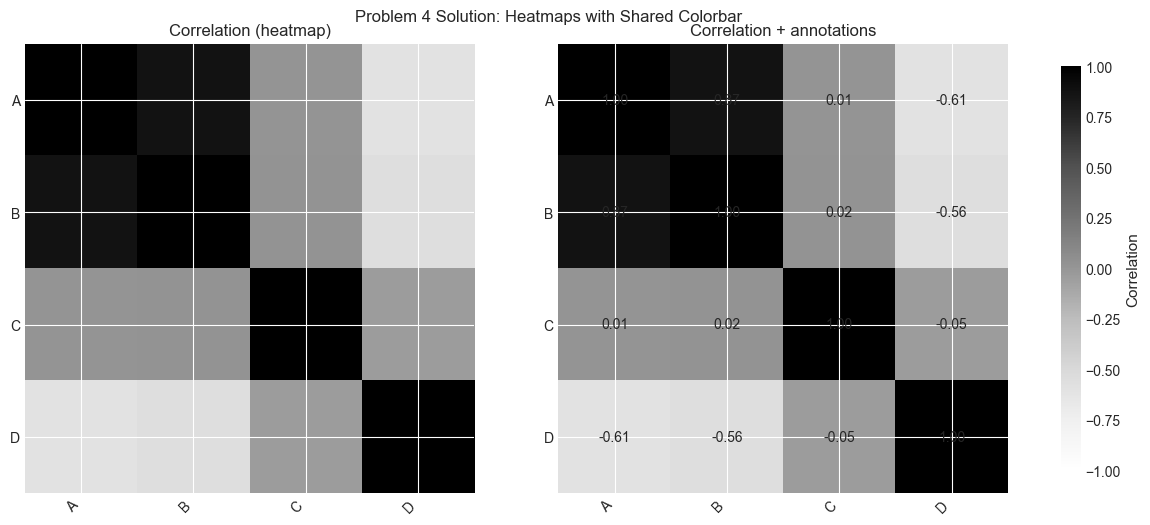

In [9]:
# Solution
m = 300
base = rng.normal(size=m)
df = pd.DataFrame({
    'A': base + rng.normal(scale=0.2, size=m),
    'B': 0.8 * base + rng.normal(scale=0.4, size=m),
    'C': rng.normal(size=m),
    'D': -0.5 * base + rng.normal(scale=0.6, size=m),
})

corr = df.corr(numeric_only=True)
labels = corr.columns.to_list()
mat = corr.to_numpy()

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 5))

im1 = ax1.imshow(mat, vmin=-1, vmax=1)
im2 = ax2.imshow(mat, vmin=-1, vmax=1)

for ax in (ax1, ax2):
    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_yticklabels(labels)

ax1.set_title('Correlation (heatmap)')
ax2.set_title('Correlation + annotations')

# Annotate values on the right
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        ax2.text(j, i, f"{mat[i, j]:.2f}", ha='center', va='center')

# One shared colorbar for both axes
cbar = fig.colorbar(im1, ax=[ax1, ax2], shrink=0.9)
cbar.set_label('Correlation')

fig.suptitle('Problem 4 Solution: Heatmaps with Shared Colorbar', y=1.02)
plt.show()

## Problem 5 — Dashboard layout with `subplot_mosaic`

Build a small "analytics dashboard" with this layout:

```
AAAB
CCCB
DDDB
```

Where:
- `A`: time series line plot
- `B`: horizontal bar chart (top categories)
- `C`: scatter plot with a trend line (simple linear fit)
- `D`: distribution (histogram)

Requirements:
- Use `plt.subplot_mosaic`.
- Add a figure-level title.
- Make axes titles descriptive.


In [10]:
# Starter data
dates = pd.date_range('2025-06-01', periods=90, freq='D')
series = 50 + np.cumsum(rng.normal(0, 0.8, len(dates)))

cats = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon']
scores = rng.integers(20, 120, size=len(cats))

x = rng.normal(size=300)
y = 1.8 * x + rng.normal(scale=0.9, size=x.size)

samples = rng.normal(loc=0.0, scale=1.0, size=1000)

# TODO: Create the mosaic dashboard and plot each panel.
None

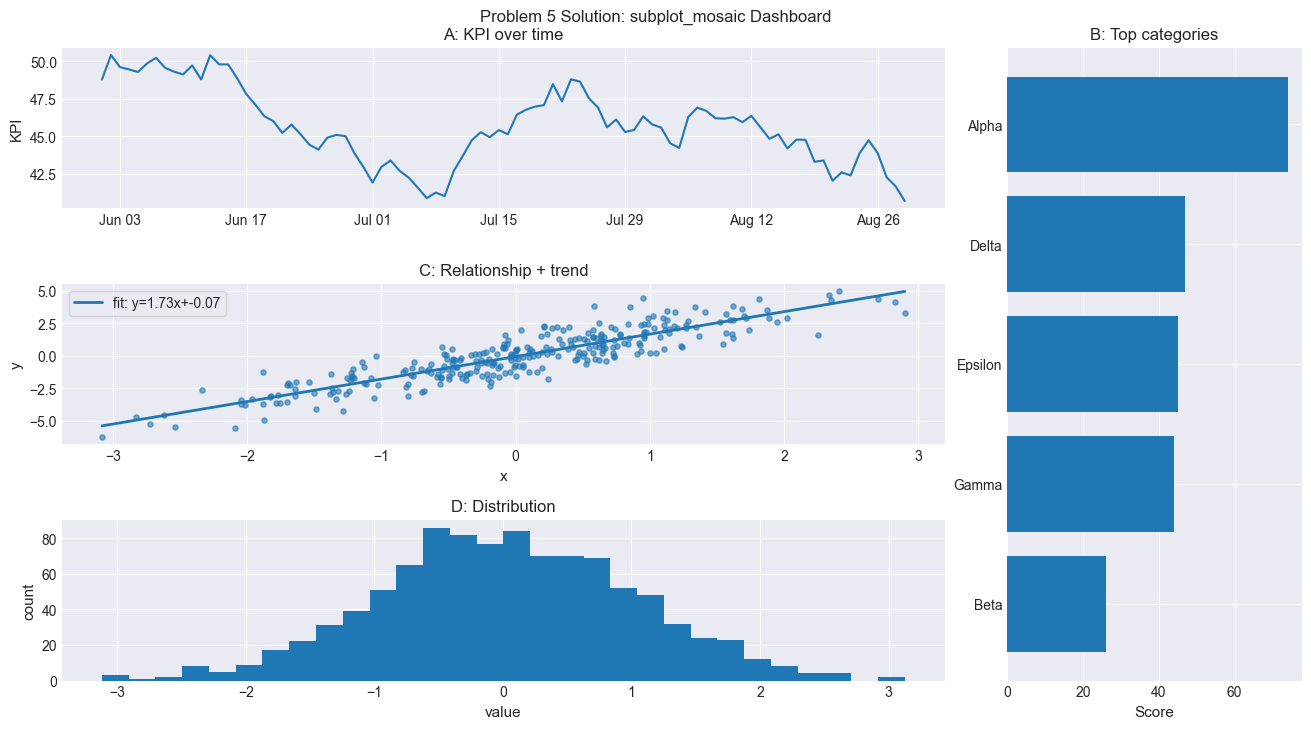

In [11]:
# Solution
dates = pd.date_range('2025-06-01', periods=90, freq='D')
series = 50 + np.cumsum(rng.normal(0, 0.8, len(dates)))

cats = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon']
scores = rng.integers(20, 120, size=len(cats))

x = rng.normal(size=300)
y = 1.8 * x + rng.normal(scale=0.9, size=x.size)

samples = rng.normal(loc=0.0, scale=1.0, size=1000)

mosaic = [
    ['A', 'A', 'A', 'B'],
    ['C', 'C', 'C', 'B'],
    ['D', 'D', 'D', 'B'],
]

fig, axd = plt.subplot_mosaic(mosaic, constrained_layout=True, figsize=(13, 7))

# A: time series
axA = axd['A']
axA.plot(dates, series)
axA.set_title('A: KPI over time')
axA.set_ylabel('KPI')
axA.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
axA.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# B: horizontal bars
axB = axd['B']
order = np.argsort(scores)
axB.barh(np.array(cats)[order], scores[order])
axB.set_title('B: Top categories')
axB.set_xlabel('Score')

# C: scatter + linear fit
axC = axd['C']
axC.scatter(x, y, s=14, alpha=0.6)
coef = np.polyfit(x, y, deg=1)
xx = np.linspace(x.min(), x.max(), 200)
yy = coef[0] * xx + coef[1]
axC.plot(xx, yy, linewidth=2, label=f'fit: y={coef[0]:.2f}x+{coef[1]:.2f}')
axC.set_title('C: Relationship + trend')
axC.set_xlabel('x')
axC.set_ylabel('y')
axC.legend(loc='upper left', frameon=True)

# D: histogram
axD = axd['D']
axD.hist(samples, bins=30)
axD.set_title('D: Distribution')
axD.set_xlabel('value')
axD.set_ylabel('count')

fig.suptitle('Problem 5 Solution: subplot_mosaic Dashboard', y=1.02)
plt.show()

## Problem 6 — Inset axes (zoom) + marking a region of interest

Create a main plot of a noisy signal and then add a **zoomed inset** focusing on a short interval.

Requirements:
- Use `inset_axes` (from `mpl_toolkits.axes_grid1.inset_locator`).
- Draw a rectangle (or use `mark_inset`) to show the zoomed region.
- Inset should show the same data but with tighter x/y limits.


In [12]:
# Starter data
t = np.linspace(0, 20, 1200)
signal = np.sin(t) + 0.25 * np.sin(4*t) + 0.15 * rng.standard_normal(t.size)

# TODO: Main plot + inset zoom between t=8 and t=10.
None

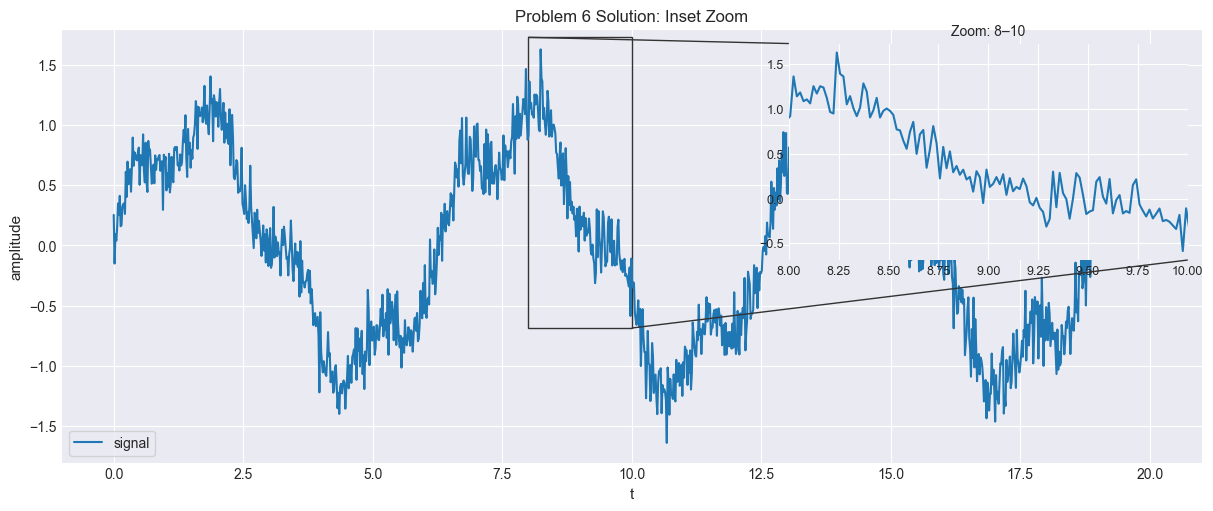

In [13]:
# Solution
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

t = np.linspace(0, 20, 1200)
signal = np.sin(t) + 0.25 * np.sin(4*t) + 0.15 * rng.standard_normal(t.size)

fig, ax = plt.subplots(constrained_layout=True, figsize=(12, 5))
ax.plot(t, signal, label='signal')
ax.set_title('Problem 6 Solution: Inset Zoom')
ax.set_xlabel('t')
ax.set_ylabel('amplitude')

# Define zoom region
x1, x2 = 8.0, 10.0
mask = (t >= x1) & (t <= x2)
ymin = signal[mask].min()
ymax = signal[mask].max()

# Inset axes
axins = inset_axes(ax, width='35%', height='50%', loc='upper right', borderpad=1)
axins.plot(t, signal)
axins.set_xlim(x1, x2)
axins.set_ylim(ymin - 0.1, ymax + 0.1)
axins.set_title('Zoom: 8–10', fontsize=10)
axins.tick_params(labelsize=9)

# Mark inset region
mark_inset(ax, axins, loc1=2, loc2=4, fc='none', ec='0.2')

ax.legend(loc='lower left', frameon=True)
plt.show()

## Quick checklist (best practices)

- Prefer `constrained_layout=True` for multi-panel figures.
- Use `sharex/sharey` when panels are directly comparable.
- Use **one common legend** when it improves readability.
- Keep titles and labels concise and consistent.
- For dates: use `mdates` locators/formatters.
- Consider `subplot_mosaic` for dashboards and `GridSpec` for custom layouts.